In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand, randint

In [3]:
#def f_obj(X):
#    return (X[1]-X[0]**2)**2+100*(1-X[0])**2
def f_obj(X):
    return 15*X[1]**2*X[0]**2*np.exp(-X[1]**2-X[0]**2)

In [5]:
## population initiale
bornes=[[-10,10],[-10,10]] # l'espace des solutions réalisables
N=10# Taille de la population initiale
bits=8 # le nombre de bits 
pop=[randint(0,2,bits*len(bornes)).tolist() for i in range(N)]
pop=np.array(pop)
print(len(pop))
#pop.shape
print(pop)

10
[[1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0]
 [1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1]
 [0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0]
 [1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0]
 [0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1]
 [0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1]
 [0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1]
 [0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1]
 [0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1]]


In [6]:
## Définition de la fonction de codage
def decoding(bornes,bits,chromosome):
    chromosome_re=[]
    for i in range(len(bornes)):
        st,en=i*bits,(i*bits)+bits
        sub=chromosome[st:en]
        chars=''.join([str(j) for j in sub])
        integer=int(chars,2)
        val_re=bornes[i][0]+(integer*((bornes[i][1]-bornes[i][0])/(2**bits-1)))
        chromosome_re.append(val_re)
    return chromosome_re

In [7]:
pop_re=[decoding(bornes,bits,p) for p in pop]
pop_re

[[8.431372549019606, 0.6666666666666661],
 [-4.2745098039215685, 3.019607843137255],
 [9.52941176470588, -7.254901960784314],
 [-5.372549019607844, -3.2549019607843137],
 [0.9803921568627452, 2.7058823529411757],
 [-0.27450980392156943, -5.8431372549019605],
 [-4.901960784313726, 2.1568627450980387],
 [-6.235294117647059, 3.4117647058823533],
 [-6.549019607843137, 3.4117647058823533],
 [-8.666666666666666, 10.0]]

In [10]:
#def fitness(f_obj,pop_re):
#    fitnes=[1/(1+f_obj(X)) for X in pop_re]
 #   return fitnes

In [10]:
def fitness(f_obj,pop_re):
    fitnes=[f_obj(X) for X in pop_re]
    return fitnes

In [11]:
fit=fitness(f_obj,pop_re)
fit

[4.069496691697229e-29,
 3.1817878233069157e-09,
 3.6212355546045245e-58,
 3.3484616091185475e-14,
 0.026684643260636538,
 5.320844292133242e-14,
 5.866186335029516e-10,
 7.791603341758473e-19,
 1.5574437917277098e-20,
 1.0046300630338865e-71]

In [12]:
## Selection par Roulette de Wheel
def selection_R_W(pop,fitness,N):
    generation_suiv=[]
    select=np.argmax(fitness)
    generation_suiv.append(pop[select])
    P=[f/sum(fitness) for f in fitness] 
    index=list(range(int(len(pop))))
    index_selec=np.random.choice(index,size=N-1,replace=False,p=P)
    s=0
    for i in range(N-1):
        generation_suiv.append(pop[index_selec[i]])
        i+=1
    return generation_suiv


In [13]:
selection_R_W(pop,fit,N)

[array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]),
 array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]),
 array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1]),
 array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]),
 array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]),
 array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]),
 array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]),
 array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1])]

In [14]:
### Croisement
def croisement(pop,tau_croisement):
    enfants=[]
    for i in range(int(len(pop)/2)):
        p1=np.array(pop[2*i-1].copy())
        #print(p1)
        p2=pop[2*i].copy()
        if rand()< tau_croisement:
            pc=randint(1,len(p1)-1,size=2) #choix de deux points de croisement
            while pc[0]==pc[1]:
                pc=randint(1,len(p1)-1,size=2)
            pc=sorted(pc)
            #print(pc)
            #print(p1[:pc[0]])
            #print(p2[pc[0]:pc[1]])
            e1=np.hstack((p1[0:pc[0]], p2[pc[0]:pc[1]],p1[pc[1]:]))
            e2=np.hstack((p2[0:pc[0]], p1[pc[0]:pc[1]],p2[pc[1]:]))
            #e2=p2[:pc[0]]+p1[pc[0]:pc[1]]+p2[pc[1]:]
            enfants.append(e1)
            enfants.append(e2)
        else:
            enfants.append(p1)
            enfants.append(p2)
    return enfants

In [15]:
tau_croisement=0.7
croisement(pop,tau_croisement)
#p1=pop[-1].copy()
#p1

[array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]),
 array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1]),
 array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]),
 array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]),
 array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]),
 array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1]),
 array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]),
 array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1])]

In [16]:
def mutation(pop,tau_mutation):
    enfants=[]
    for i in range(int(len(pop))):
        p1=pop[i].copy()
        if rand()< tau_mutation:
            pm=randint(0,len(p1))
            e1=p1
            if e1[pm]==1:
                e1[pm]=0
            else:
                e1[pm]=1
            enfants.append(e1)
        else:
             enfants.append(p1)
    return enfants

In [17]:
tau_mutation=0.1
mutation(pop,tau_mutation)

[array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]),
 array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1]),
 array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]),
 array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]),
 array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]),
 array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1]),
 array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]),
 array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]),
 array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])]

In [18]:
## Programme principal

#bornes=[[-3,3],[-3,3]] # l'espace des solutions réalisables
### Paramètres
N=100 # Taille de la population initiale
#bits=8 # le nombre de bits 
Iter_max=100
tau_mutation=0.1
tau_croisement=0.7
## Population initiale
pop=[randint(0,2,bits*len(bornes)).tolist() for i in range(N)]
#########
val_min=[]
list_best_sol=[]
for itr in range(Iter_max):
    pop_re=[decoding(bornes,bits,p) for p in pop]
    fit=fitness(f_obj,pop_re)
    pop=selection_R_W(pop,fit,N)
    enfants=croisement(pop,tau_croisement)
    enfants=mutation(enfants,tau_croisement)
    pop=[]
    for s in enfants:
        pop.append(s)
    pop_re=[decoding(bornes,bits,p) for p in pop]
    fit=fitness(f_obj,pop_re)
    index=np.argmax(fit)
    #print(index)
    list_best_sol.append(pop_re[index])
    val_min.append(f_obj(list_best_sol[-1]))
    itr+=1

print('La valeur de la fonction objective minimale',val_min[-1])
print('L optimum est ', list_best_sol[-1])

##############################################

La valeur de la fonction objective minimale 1.794381925276955
L optimum est  [1.1372549019607838, -1.2156862745098032]


Text(0, 0.5, 'Valeur de la fonction objective')

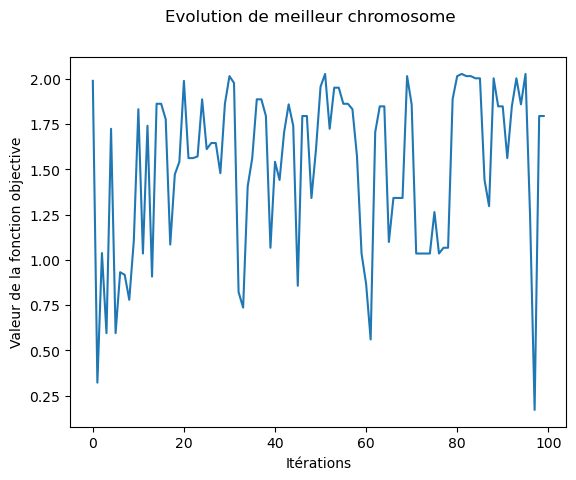

In [19]:
plt.plot(val_min)
plt.suptitle('Evolution de meilleur chromosome')
plt.xlabel('Itérations')
plt.ylabel('Valeur de la fonction objective')

TypeError: f_obj() takes 1 positional argument but 2 were given

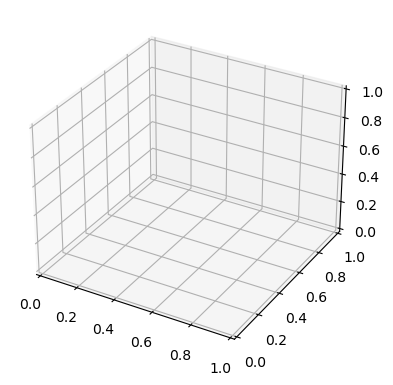

In [21]:
# Affichage des résultats
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f_obj(X, Y)
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter(x_values, y_values, rosenbrock_values, color='red', label='Descente de gradient')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Rosenbrock(x, y)')
ax.set_title('Fonction de Rosenbrock')